In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('imbd_superhero.csv', header=None)
data.columns = ['An', 'Titlu','Organizatia', 'IMBD', 'AltRating', 'DataX', 'UnkColumn', 'PretMediulaBilet', 'NrDeSpectatori', 'TopPentruAncutare']

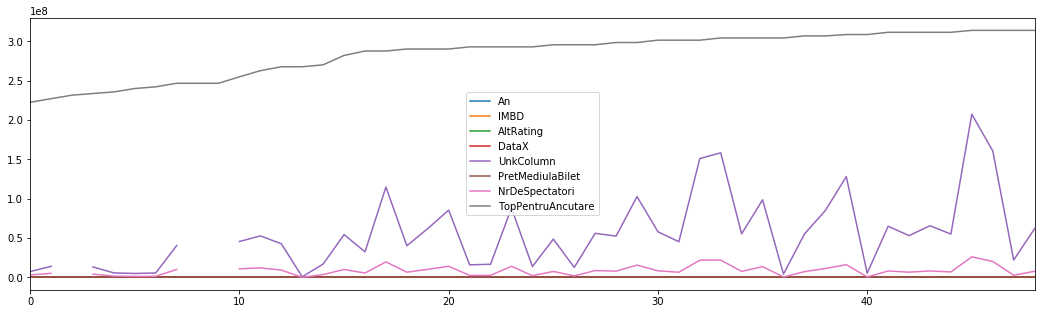

In [5]:
data.plot(figsize=(18, 5))

In [6]:
data.isnull().values.any()

True

In [7]:
data.head()

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnkColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare
0,1978,Superman,DC,7.3,95,84.0,7465343.0,2.34,3190317.521,222584545
1,1980,Superman II,DC,6.7,88,77.5,14100523.0,2.69,5241830.112,227224681
2,1982,Swamp Thing,DC,5.3,60,56.5,NaN,2.94,NaN,231664458
3,1983,Superman III,DC,4.9,24,36.5,13352357.0,3.15,4238843.492,233791994
4,1984,Supergirl,DC,4.2,8,25.0,5738249.0,3.36,1707812.202,235824902


In [8]:
data_fara_lipse = data.dropna()
data_fara_lipse.tail()

,An,Titlu,Organizatia,IMBD,AltRating,DataX,UnkColumn,PretMediulaBilet,NrDeSpectatori,TopPentruAncutare
44,2011,X-Men: First Class,Marvel,7.9,87,83.0,55101604.0,7.93,6.948500e+06,311591917
45,2012,Marvel's The Avengers,Marvel,8.7,92,89.5,207438708.0,7.92,2.619176e+07,314055984
46,2012,The Dark Knight Rises,DC,9.1,86,88.5,160887295.0,7.92,2.031405e+07,314055984
47,2012,Ghost Rider: Spirit of Vengeance,Marvel,4.5,17,31.0,22115334.0,7.92,2.792340e+06,314055984
48,2012,The Amazing Spider-Man,Marvel,7.6,74,75.0,62004688.0,7.92,7.828875e+06,314055984


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBE62B9828>,
      dtype=object)

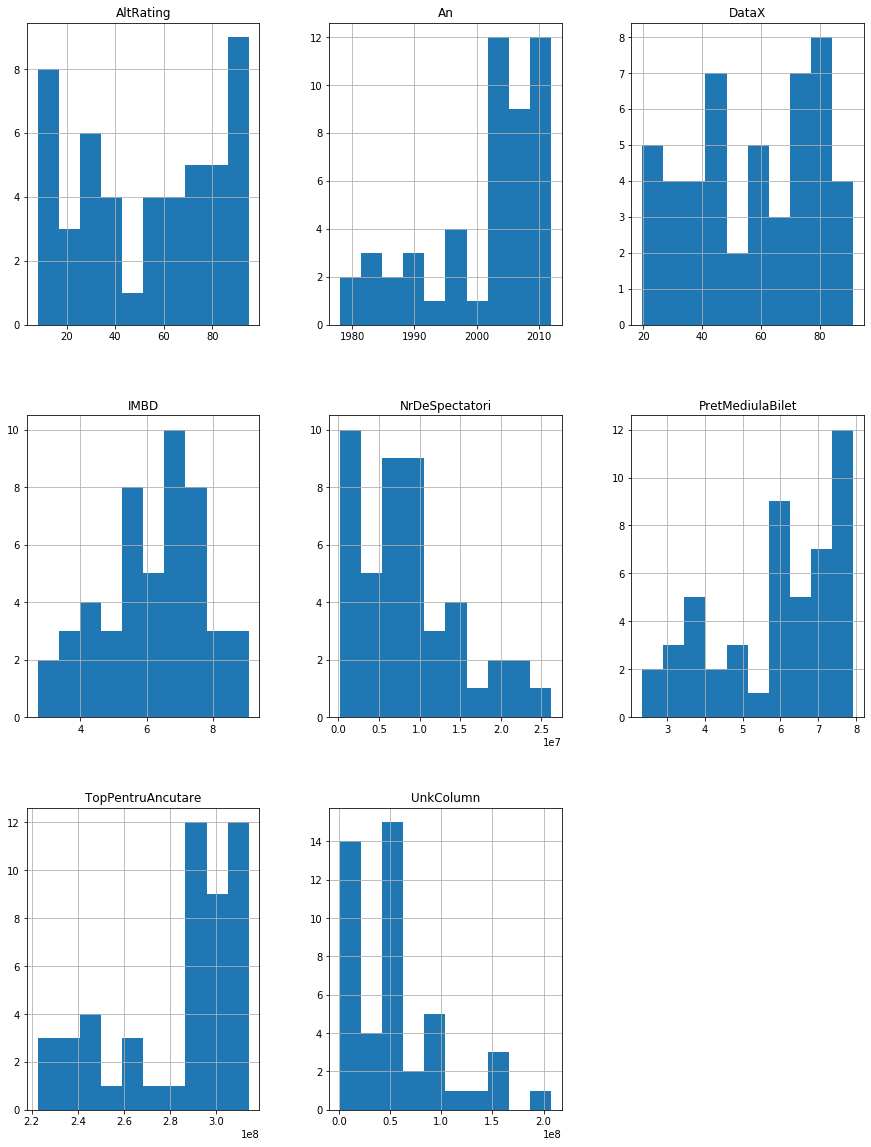

In [9]:
data.hist(figsize = (15,20))

In [10]:
dc = data[data['Organizatia'] == 'DC']
XY = dc[['An', 'PretMediulaBilet']]
# caracteristica an - variabila independenta x
X = dc['An']
# raspunsul Pretul mediu la bilet - variabila dependenda y
Y = dc['PretMediulaBilet']
X.count() == Y.count() ## daca true, avem acelasi numar de observatii
print("Numarul de observatii este ")
n = X.count()
print(n) ## 20 de observatii
print("Incepand cu ")
print(X.iloc[0]) ## iloc - indexul
print("pana in")
print(X.iloc[n-1])

Numarul de observatii este 
20
Incepand cu 
1978
pana in
2012


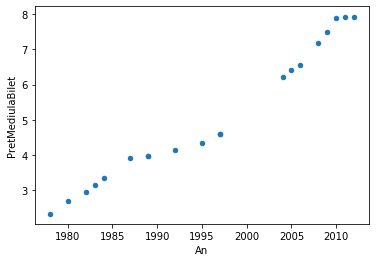

In [11]:
XY.plot.scatter(y = 'PretMediulaBilet', x = 'An')

In [13]:
XY.corr()

,An,PretMediulaBilet
An,1.000000,0.983996
PretMediulaBilet,0.983996,1.000000


In [14]:
model = LinearRegression()

In [17]:
scores = []
kfold = KFold(n_splits = 3, shuffle = True, random_state=42)

In [18]:
X = dc.as_matrix(['An'])
Y = dc.as_matrix(['PretMediulaBilet'])

c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [20]:

pretMediuBilet_model = model.fit(X,Y)
pretMediuBilet_model.predict(np.array([[2021]]))

array([[9.18758942]])

In [21]:
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, Y)):
     scores.append(model.score(X, Y))
print(scores)

[0.9682484541027244, 0.9682484541027244, 0.9682484541027244]


Concluzie:

In urma lucrarii de laborator s-a invatat cum se configureaza un mediu Phython pentru Machine Learning. S-a studiat diferenta dintre dataframe si o serie, s-a invatat cum se normalizeaza datele si cum se construesc graficile.